## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1:Chen 4116
# student 2:Maor 3061
# student 3:Pavel 7513
# student 4:Tamara 0087
# (optional) student 5:Dan 9311
# (optional) student 6: 

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import sklearn
%matplotlib inline 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

In [3]:
df_train = pd.read_csv("titanic_train.csv")
df_test = pd.read_csv("titanic_test.csv")

In [4]:
display(df_train.head())
display(df_test.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [5]:
df_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [6]:
df_train.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.126986,-0.319927,0.093572,0.048225,-0.543722,0.040708,-0.324024
Sex,0.126986,1.000000,0.089108,-0.079976,-0.242467,-0.183650,-0.124908,-0.550699
Age,-0.319927,0.089108,1.000000,-0.270404,-0.202725,0.071787,0.031524,-0.072729
SibSp,0.093572,-0.079976,-0.270404,1.000000,0.415491,0.136861,-0.049109,-0.031052
Parch,0.048225,-0.242467,-0.202725,0.415491,1.000000,0.151631,-0.072698,0.074699
Fare,-0.543722,-0.183650,0.071787,0.136861,0.151631,1.000000,0.078197,0.264345
Embarked,0.040708,-0.124908,0.031524,-0.049109,-0.072698,0.078197,1.000000,0.099162
Survived,-0.324024,-0.550699,-0.072729,-0.031052,0.074699,0.264345,0.099162,1.000000


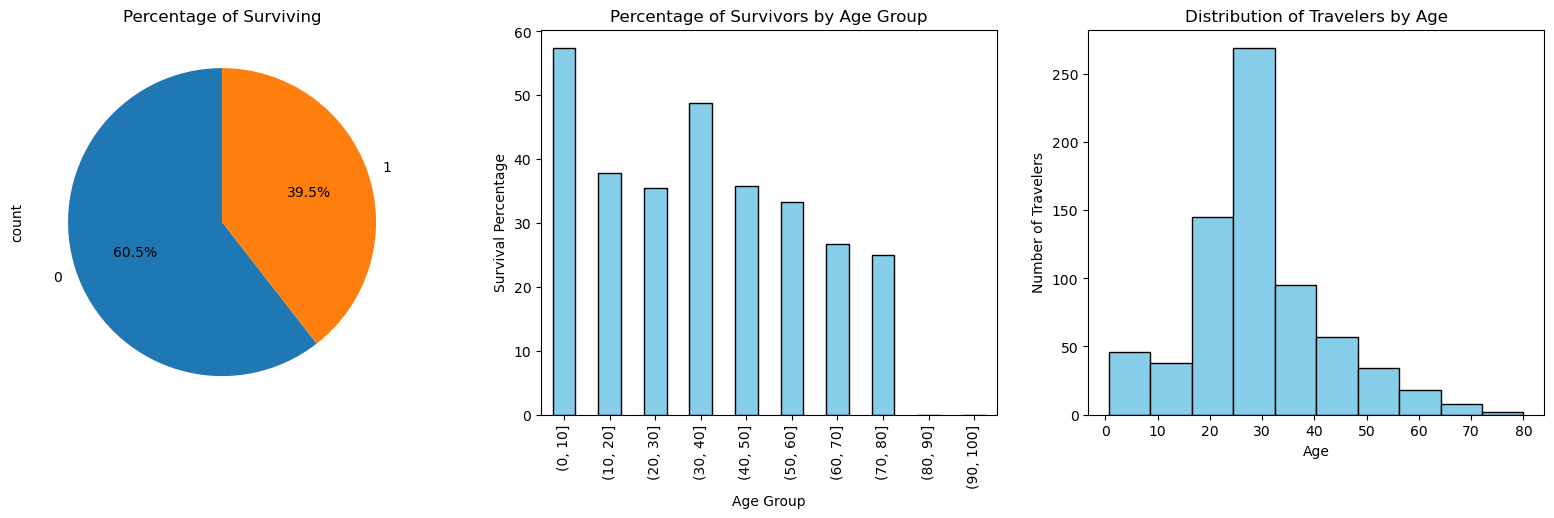

In [8]:
# Create age groups in ten-year intervals
age_bins = range(0, 101, 10)  # Start from 0 to 100, with a step of 10

# Assign each passenger to their respective age group
df_train['Age_Group'] = pd.cut(df_train['Age'], bins=age_bins)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5*1))

# Plotting pie chart for percentage of Surviving
df_train['Survived'].value_counts().plot.pie(ax=axes[0], autopct="%1.1f%%", startangle=90)
axes[0].set_title("Percentage of Surviving")

# Calculating percentage of survivors by age group
age_group_survival_percentage = df_train.groupby('Age_Group')['Survived'].mean() * 100

# Plotting percentage of survivors by age group
age_group_survival_percentage.plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Survival Percentage')
axes[1].set_title('Percentage of Survivors by Age Group')

# Histogram for distribution of travelers by age
axes[2].hist(df_train['Age'], bins=10, color='skyblue', edgecolor='black')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Number of Travelers')
axes[2].set_title('Distribution of Travelers by Age')

plt.show()



In [9]:
def train_std_Scaling(X_train):
    scaling_info = pd.DataFrame({'mean':X_train.mean(),'std':X_train.std()})
    X_train_scaled = pd.DataFrame(columns=X_train.columns)
    for col in X_train:
        X_train_scaled[col] = (X_train[col] - scaling_info.loc[col,'mean'])/scaling_info.loc[col,'std']
    return scaling_info, X_train_scaled 

In [10]:
def train_minmax_Scaling(X_train):
    X_train_scaled=X_train.copy()
    scaling_info=pd.DataFrame(index=X_train_scaled.columns.tolist(),columns=["min","max"])
    for col in X_train_scaled:
        min= X_train_scaled[col].min()
        max= X_train_scaled[col].max()
        X_train_scaled[col]=(((X_train_scaled[col]-min)*2)/(max-min))-1
        scaling_info.loc[col]=[min,max]
      
    return scaling_info,X_train_scaled

In [11]:
def test_std_Scaling(trained_scaling_info,  X_test):
    
    
    X_test_scaled = pd.DataFrame(columns=X_test.columns)
    for col in X_test:
        X_test_scaled[col] = (X_test[col] - trained_scaling_info.loc[col,'mean'])/trained_scaling_info.loc[col,'std']
    
    return X_test_scaled

In [12]:
def test_minmax_Scaling(trained_scaling_info,  X_test):
    X_test_scaled=X_test.copy()
    for col in X_test_scaled:
        X_test_scaled[col]=((X_test_scaled[col]-trained_scaling_info.loc[col,"min"])*2)/(trained_scaling_info.loc[col,"max"]-trained_scaling_info.loc[col,"min"])-1
    return X_test_scaled
    

In [13]:
def calcDis(X_train_scaled,X_test_scaled,method):
    df_dist = pd.DataFrame(columns=X_train_scaled.index,index=X_test_scaled.index)
    if(method=="cheb"):
        for col in df_dist.columns:
            for row in df_dist.index:
                df_dist.loc[row,col] = max((X_test_scaled.loc[row].sub(X_train_scaled.loc[col])).abs())
    elif(method=="auc"):
        for i, test_index in enumerate(X_test_scaled.index):
            for j, train_index in enumerate(X_train_scaled.index):
                dis = np.linalg.norm(X_test_scaled.loc[test_index] - X_train_scaled.loc[train_index])
                df_dist.at[test_index, train_index] = dis
    
    return df_dist

In [16]:
def KNN_predict(X_test_scaled, X_train_scaled, y_train, k, method ,df_dist):
    
    #df_dist=calcDis(X_train_scaled,X_test_scaled, method)
    y_predicted = pd.Series(index=X_test_scaled.index)
    for ind in X_test_scaled.index:
        top_scores = np.argsort(df_dist.loc[ind])[0:k]
        top_classes = y_train.loc[top_scores]
        y_predicted.loc[ind] = statistics.mode(top_classes)
    return y_predicted

In [17]:
def eval_performance(y_predicted,y_test):
    TP = ((y_predicted == 1) & (y_test == 1)).sum()
    TP_FP = (y_predicted==1).sum()
    TP_FN = (y_test==1).sum()
    precision= TP/TP_FP
    recall=TP/TP_FN
    f1 = 2 * (precision * recall) / (precision + recall)
    return precision,recall,f1

In [18]:
def KNN_prediction(X_test_scaled, X_train_scaled, y_train, k, method,y_test,df_dist):
    y_predict=KNN_predict(X_test_scaled, X_train_scaled, y_train, k, method ,df_dist)
    precision,recall,f1=eval_performance(y_predict,y_test)
    return precision,recall,f1


In [19]:
def naive_base_predict(X_test_scaled, X_train_scaled, y_train, y_test ,var_smoothing):

    # Training the Naive Bayes model
    nb_model = GaussianNB(var_smoothing=var_smoothing)
    nb_model.fit(X_train_scaled, y_train)

    # Making predictions
    y_pred = nb_model.predict(X_test_scaled)

    # Evaluating the model
    precision,recall,f1 = eval_performance(y_test, y_pred)
    return precision,recall,f1

In [20]:
#loading the data
df_train = pd.read_csv("titanic_train.csv")
df_test = pd.read_csv("titanic_test.csv")

#seperate the label from the data
y_train=df_train.pop("Survived")
y_test=df_test.pop("Survived")

#create the std normalized scaled df
scailig_std_info,df_train_std_scaled = train_std_Scaling(df_train)
df_test_std_scaled = test_std_Scaling(scailig_std_info,df_test)

#create the min max normalized df
scalig_minmax_info,df_train_minmax_scaled = train_minmax_Scaling(df_train)
df_test_minmax_scaled = test_minmax_Scaling(scalig_minmax_info,df_test)

#create the results df
columns=["Method","Hyper Parameter","Precision","Recall","F1","Split", "Scailing Method"]
results=pd.DataFrame(columns=columns)

# prepare the 5 cross validation 
count=1
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for train_index, test_index in kf.split(df_train):
    print(count)
    X_split_std_train, X_split_std_test = df_train_std_scaled.iloc[train_index], df_train_std_scaled.iloc[test_index]
    X_split_std_train.reset_index(drop=True, inplace=True)
    X_split_std_test.reset_index(drop=True, inplace=True)
    
    y_split_train, y_split_test = y_train.iloc[train_index], y_train.iloc[test_index]
    y_split_test.reset_index(drop=True, inplace=True)
    y_split_train.reset_index(drop=True, inplace=True)
    
    X_split_minmax_train, X_split_minmax_test = df_train_minmax_scaled.iloc[train_index], df_train_minmax_scaled.iloc[test_index]
    X_split_minmax_train.reset_index(drop=True, inplace=True)
    X_split_minmax_test.reset_index(drop=True, inplace=True)
    
    for met in ["cheb","auc"]:
        df_std_dist=calcDis(X_split_std_train,X_split_std_test, met)
        df_minmax_dist=calcDis(X_split_minmax_train,X_split_minmax_test, met)
        for k in [3,5,7,9]:
            precision,recall,f1=KNN_prediction(X_split_std_test,X_split_std_train, y_split_train, k, met,y_split_test,df_std_dist)
            new=[met,k,precision,recall,f1,count,"Std"]
            results.loc[len(results.index)]=new
            
            precision,recall,f1=KNN_prediction(X_split_minmax_test,X_split_minmax_train, y_split_train, k, met,y_split_test,df_minmax_dist)
            new=[met,k,precision,recall,f1,count,"Minmax"]
            results.loc[len(results.index)]=new
    
    for smt in [1e-9,1e-7]:
    
        precision,recall,f1=naive_base_predict(X_split_std_test,X_split_std_train, y_split_train,y_split_test,smt) 
        new=["Naive",smt,precision,recall,f1,count,"Std"]
        results.loc[len(results.index)]=new

        precision,recall,f1=naive_base_predict(X_split_minmax_test,X_split_minmax_train, y_split_train,y_split_test,smt) 
        new=["Naive",smt,precision,recall,f1,count,"Minmax"]
        results.loc[len(results.index)]=new
        
    print(len(results.index))
    count+=1
results

1
20
2
40
3
60
4
80
5
100


,Method,Hyper Parameter,Precision,Recall,F1,Split,Scailing Method
0,cheb,3.000000e+00,0.721311,0.687500,0.704000,1,Std
1,cheb,3.000000e+00,0.714286,0.703125,0.708661,1,Minmax
2,cheb,5.000000e+00,0.777778,0.656250,0.711864,1,Std
3,cheb,5.000000e+00,0.792453,0.656250,0.717949,1,Minmax
4,cheb,7.000000e+00,0.785714,0.687500,0.733333,1,Std
...,...,...,...,...,...,...,...
95,auc,9.000000e+00,0.829268,0.596491,0.693878,5,Minmax
96,Naive,1.000000e-09,0.701754,0.816327,0.754717,5,Std
97,Naive,1.000000e-09,0.701754,0.816327,0.754717,5,Minmax
98,Naive,1.000000e-07,0.701754,0.816327,0.754717,5,Std


In [21]:
results_without_split = results.drop(columns=['Split'])

avg_results = results_without_split.groupby(['Method', 'Hyper Parameter','Scailing Method']).mean().reset_index().sort_values(by='F1', ascending=False)

display(avg_results)

,Method,Hyper Parameter,Scailing Method,Precision,Recall,F1
19,cheb,9.000000e+00,Std,0.763281,0.727937,0.743427
17,cheb,7.000000e+00,Std,0.732625,0.727715,0.728046
11,auc,9.000000e+00,Std,0.754630,0.700115,0.725161
1,Naive,1.000000e-09,Std,0.714713,0.736969,0.723899
0,Naive,1.000000e-09,Minmax,0.714713,0.736969,0.723899
3,Naive,1.000000e-07,Std,0.714713,0.736969,0.723899
2,Naive,1.000000e-07,Minmax,0.714713,0.736969,0.723899
7,auc,5.000000e+00,Std,0.735267,0.702996,0.717638
15,cheb,5.000000e+00,Std,0.733650,0.703965,0.716485
9,auc,7.000000e+00,Std,0.743924,0.693600,0.716462


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [22]:
best_method = avg_results.iloc[0,0]
best_hp = avg_results.iloc[0,1]
best_scaling = avg_results.iloc[0,2]
if(best_scaling=="Std"):
    X_train_scaled = df_train_std_scaled
    X_test_scaled = df_test_std_scaled
else:
    X_train_scaled = df_train_minmax_scaled
    X_test_scaled = df_test_minmax_scaled
    
print(best_method,best_hp)


cheb 9.0


## Part 4 - Apply on test and show model performance estimation

In [23]:
if best_method == "Naive":
    precision,recall,f1 = naive_base_predict(X_test_scaled, X_train_scaled, y_train, y_test,best_hp)
else:
    df_dist=calcDis(X_train_scaled,X_test_scaled, best_method)
    precision,recall,f1 = KNN_prediction(X_test_scaled, X_train_scaled, y_train, int(best_hp), best_method,y_test,df_dist)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.7014925373134329
Recall: 0.7704918032786885
F1 Score: 0.734375
